# TAREA 11
## EJERCICIO 1
Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.


### SOLUCIÓN

In [43]:
function metodoeuler(f, x0, t0, tf, h) #La función recibe a f=f(x,t), x0 como condicion inicial,t0 como tiempo inicial, tf como tiempo final y h el tamaño del subintervalo
   
    tArray = linspace(t0, tf, round((tf-t0)/h)); #intervalo de tiempo dividio en r((tf-ti)/h) subintervalos
    xArray = zeros(length(tArray)); #mismo número de ceros que las entradas de tarray
    xArray[1] = x0; #condicion inicial de la EDO
    
    for i in 1:length(tArray)-1  #implementando el método de Euler
        xArray[i+1] = xArray[i] +h*f(tArray[i], xArray[i]);
    end
  
    return tArray, xArray; 
end;

In [44]:
#Ahora definimos la función g de dos variables y a a=2.5 como se pide en el ejercicio
function g(t,x)
    return -2.5*x;
end;

In [45]:
#aplicamos la función para x(0)=1, t0=0, tf=8 y h=1.0,0.5,0.2,0.01, renombrando a cada lista que nos arroja el resultado para poder graficarlo después:
(tArray1, xArray1) = metodoeuler(g, 1.0, 0.0, 8.0, 1.0);
(tArray2, xArray2) = metodoeuler(g, 1.0, 0.0, 8.0, 0.5);
(tArray3, xArray3) = metodoeuler(g, 1.0, 0.0, 8.0, 0.2);
(tArray4, xArray4) = metodoeuler(g, 1.0, 0.0, 8.0, 0.01);

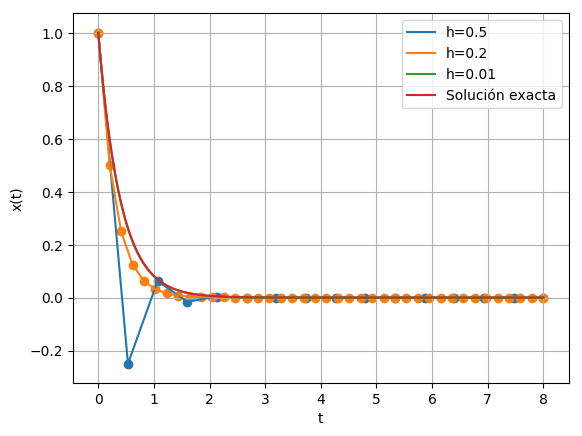

In [46]:
#Graficamos para h=0.5, 0.2 , 0.01
grid("on");
xlabel("t");
ylabel("x(t)");

scatter(tArray2, xArray2);
plot(tArray2, xArray2, label="h=0.5");

scatter(tArray3, xArray3);
plot(tArray3, xArray3, label="h=0.2");

#Notemos que no es necesario hacer "scatter" para este caso, pues h es muy pequeño, al suceder esto, esta solución se empalma con la solución exacta
plot(tArray4, xArray4, label="h=0.01"); 

plot(tArray4, exp.(-2.5*tArray4), label="Solución exacta");
legend();

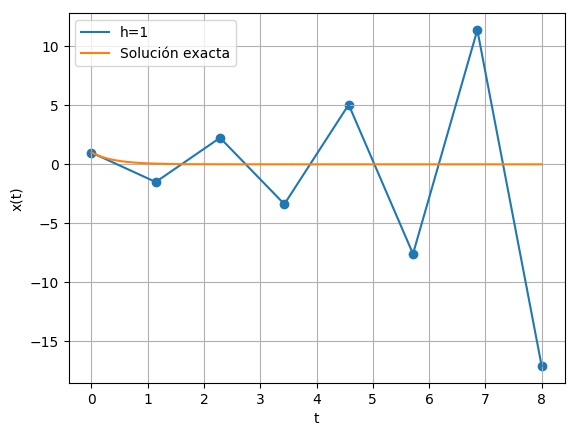

In [47]:
#Ahora graficamos para h=1 y la solución exacta:
grid("on");
xlabel("t");
ylabel("x(t)");

scatter(tArray1, xArray1);
plot(tArray1, xArray1, label="h=1");

plot(tArray4, exp.(-2.5*tArray4), label="Solución exacta");
legend();

Se vuelven a realizar los pasos pero ahora para la condición inicial x0=2:

In [48]:
#aplicamos la función para x(0)=2, t0=0, tf=8 y h=1.0,0.5,0.2,0.01, renombrando a cada lista que nos arroja el resultado para poder graficarlo después:
(tArray1, xArray1) = metodoeuler(g, 2.0, 0.0, 8.0, 1.0);
(tArray2, xArray2) = metodoeuler(g, 2.0, 0.0, 8.0, 0.5);
(tArray3, xArray3) = metodoeuler(g, 2.0, 0.0, 8.0, 0.2);
(tArray4, xArray4) = metodoeuler(g, 2.0, 0.0, 8.0, 0.01);

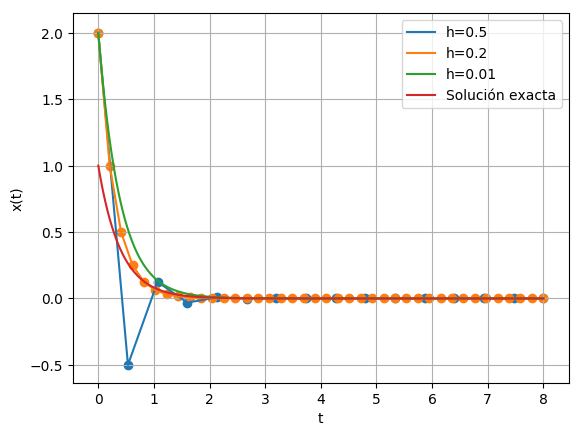

In [49]:
#Graficamos para h=0.5, 0.2 , 0.01
grid("on");
xlabel("t");
ylabel("x(t)");

scatter(tArray2, xArray2);
plot(tArray2, xArray2, label="h=0.5");

scatter(tArray3, xArray3);
plot(tArray3, xArray3, label="h=0.2");

#Notemos que no es necesario hacer "scatter" para este caso, pues h es muy pequeño, al suceder esto, esta solución se empalma con la solución exacta
plot(tArray4, xArray4, label="h=0.01"); 

plot(tArray4, exp.(-2.5*tArray4), label="Solución exacta");
legend();

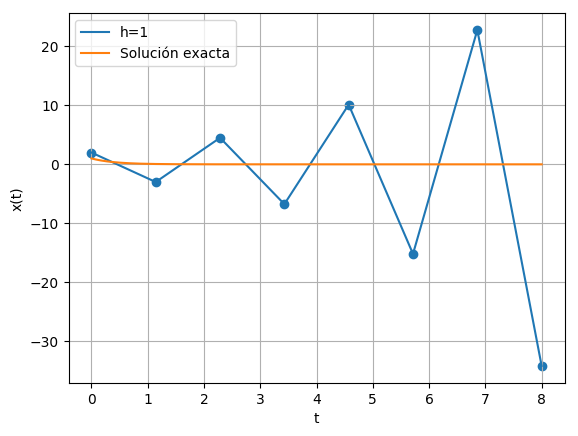

In [50]:
#Ahora graficamos para h=1 y la solución exacta:
grid("on");
xlabel("t");
ylabel("x(t)");

scatter(tArray1, xArray1);
plot(tArray1, xArray1, label="h=1");

plot(tArray4, exp.(-2.5*tArray4), label="Solución exacta");
legend();

## EJERCICIO 2
¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.


A simple vista, uno podría pensar que para resolver este
sistema uno debe desarrollar otro método para encontrar la
solución a la ecuación diferencial del ejercicio pasado. Sin
embargo, esto no es necesario.

### SOLUCIÓN
El sistema físico modelado por $\ddot{x}=-kx$ describe un oscilador armónico, cuya solución se desarrolla a continuación:

Se reacomoda la ecuación como:
$$ \ddot{x}+kx=0 $$

Usando el método de Euler, hacemos que $\lambda =\dot{x} \Rightarrow \ddot{x}=\lambda^{2}$, entonces la ecuación queda como:
$$ \lambda^{2}+k=0$$

Cuyas raíces son:
$$\lambda = \pm i k^{1/2} $$

Por lo tanto la solucion general es:
$$x(t)=c_{1}e^{i tk^{1/2}}+c_{2}e^{-i tk^{1/2}}$$

Aplicando las condiciones iniciales obtenemos:
$$ x(t)=x(0)cos(tk^{1/2})+\frac{\dot{x}}{k^{1/2}}sen(tk^{1/2}) $$

## EJERCICIO 3
Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?



### SOLUCIÓN

Dado el ejercicio anterior, se tiene que $\dot{u}=\ddot{x}(t)=-kx$. Donde se tienen dos ecuaciones:
$$\dot{x}=u $$
y
$$ \dot{u}=-kx$$

Con este sistema acoplado puedes utilizar el método de
Euler en su forma vectorial:
$$\frac{d\vec x}{dt}=\vec f(\vec x,t),$$

## EJERCICIO 4
Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.


### SOLUCIÓN


In [51]:
function euler(f,list,x0) #Método visto en clase
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [52]:
f(x,t)=[x[2], -1.0*x[1]] #Se define f de dos variables con k=1

f (generic function with 1 method)

In [53]:
list=0:0.01:8; #para el intervao [0,8]
sol=euler(f,list,[0,2]); #se define para ir guardando las soluciones

In [54]:
#Se crean las listas de soluciones:
listx1=map(x->x[1],sol);
listx2=map(x->x[2],sol);
listxteo=2*sin.(list); #resultado teórico
listxdevteo=2*cos.(list); #resultado de la derivada teórica

In [55]:
using PyPlot

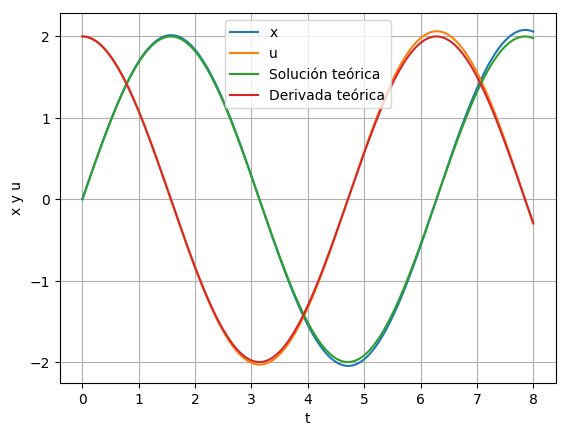

In [56]:
#graficamos:
grid("on");
xlabel("t")
ylabel("x y u")

plot(list,listx1, label="x");
plot(list,listx2, label="u");
plot(list,listxteo, label="Solución teórica");
plot(list,listxdevteo, label="Derivada teórica");
legend();

## EJERCICIO 11
Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

### SOLUCIÓN

In [57]:
#Definimos la función a la que le aplicaremos el método que hicimos en el ejercicio 1 y una función para la solción exacta:
function g(t,x)
    return (2x-18t)/(1+t);
end;

function r(t)
    return 4+8t-5t^2
end;

In [58]:
#Hacemos lo mismo que en el ejercicio 1 para los mismos valores h pero notemos que x(0)=4, por lo que 4 será x0:
(tArray1, xArray1) = metodoeuler(g, 4.0, 0.0, 8.0, 1.0);
(tArray2, xArray2) = metodoeuler(g, 4.0, 0.0, 8.0, 0.5);
(tArray3, xArray3) = metodoeuler(g, 4.0, 0.0, 8.0, 0.2);
(tArray4, xArray4) = metodoeuler(g, 4.0, 0.0, 8.0, 0.01);

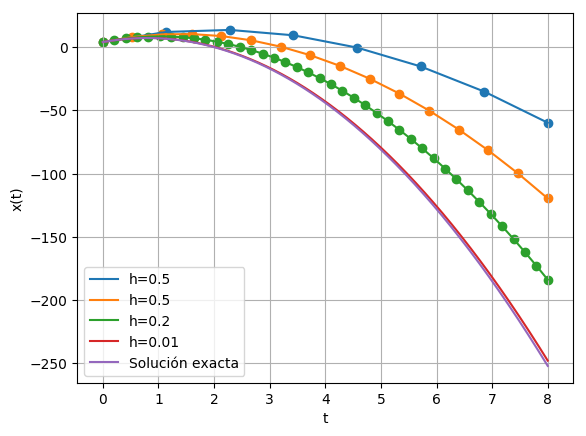

In [59]:
#Graficamos nuevamente:
grid("on");
xlabel("t");
ylabel("x(t)");

scatter(tArray1, xArray1);
plot(tArray1, xArray1, label="h=0.5");

scatter(tArray2, xArray2);
plot(tArray2, xArray2, label="h=0.5");

scatter(tArray3, xArray3);
plot(tArray3, xArray3, label="h=0.2");

plot(tArray4, xArray4, label="h=0.01"); #nuevamente no es necesaeio usar scatter pues h es muy pequeña

plot(tArray4, r.(tArray4), label="Solución exacta");
legend();